# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observed Weather Trends

--There is a clear correlation between distance from the center of the Earth and maximum temperature.
As latitude increase or decreases from around the 0-20 degree range of latitudes, the temperature decreases. 

--The further you are from the equator, the colder you would expect to be.
North of the equator, in particular 20-40 degrees, appears to be the most humid part of the world. On average, 
it appears that being north of the equator lends itself to a more humid environment vs. south of the equator.

--No matter where you are, on any given day, it could be cloudy. The highest concentration of high cloudiness corresponds
to 40-80 degrees north of the equator. In fact, if we only look at cloudiness above 50%, the highest concentration remains
with the largely far northern latitude cities. With respect to cloudiness between 5% and 50%, there appears to be no
correlation with the latitude.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key= "Insert Key Here!"


# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=Insert Key Here!&units=imperial&q='

In [37]:
# Use the variable n to determine how many cities to generate and list to track cities
# n=700 seemed safe in order to get above the 500 city threshold
n = 700
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the random generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]
    

In [38]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # If 'clouds' does not exist, set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query_url}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Configure everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=mehamn,NO
Processing record 2 | majene
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=majene,ID
Processing record 3 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=illoqqortoormiut,GL
Processing record 4 | uwayl
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=uwayl,SD
Processing record 5 | constantine
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=constantine,DZ
Processing record 6 | duluth
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=duluth,US
Processing record 7 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units

Processing record 57 | luau
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=luau,AO
Processing record 58 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=port alfred,ZA
Processing record 59 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=chokurdakh,RU
Processing record 60 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=arraial do cabo,BR
Processing record 61 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=hamilton,BM
Processing record 62 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=busselton,AU
Processing record 63 | cururupu
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439

Processing record 113 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=san patricio,MX
Processing record 114 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=tuatapere,NZ
Processing record 115 | muros
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=muros,ES
Processing record 116 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=avarua,CK
Processing record 117 | maldonado
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=maldonado,UY
Processing record 118 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=souillac,MU
Processing record 119 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020

Processing record 169 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=clyde river,CA
Processing record 170 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=nizhneyansk,RU
Processing record 171 | jibuti
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=jibuti,DJ
Processing record 172 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=esperance,AU
Processing record 173 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=codrington,AG
Processing record 174 | lianran
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=lianran,CN
Processing record 175 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b43

Processing record 226 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=saint-pierre,PM
Processing record 227 | ust-karsk
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=ust-karsk,RU
Processing record 228 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=tsihombe,MG
Processing record 229 | santa engracia
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=santa engracia,MX
Processing record 230 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=sabang,ID
Processing record 231 | paradwip
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=paradwip,IN
Processing record 232 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=74b3a

Processing record 282 | rujewa
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=rujewa,TZ
Processing record 283 | marrakesh
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=marrakesh,MA
Processing record 284 | port augusta
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=port augusta,AU
Processing record 285 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=cidreira,BR
Processing record 286 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=fortuna,US
Processing record 287 | copiapo
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=copiapo,CL
Processing record 288 | alenquer
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f0202

Processing record 337 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=leshukonskoye,RU
Processing record 338 | mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=mnogovershinnyy,RU
Processing record 339 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=pisco,PE
Processing record 340 | turbana
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=turbana,CO
Processing record 341 | tondano
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=tondano,ID
Processing record 342 | trelew
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=trelew,AR
Processing record 343 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439

Processing record 394 | umm lajj
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=umm lajj,SA
Processing record 395 | muret
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=muret,FR
Processing record 396 | waitati
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=waitati,NZ
Processing record 397 | lerwick
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=lerwick,GB
Processing record 398 | pangody
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=pangody,RU
Processing record 399 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=kahului,US
Processing record 400 | honningsvag
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&unit

Processing record 450 | totness
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=totness,SR
Processing record 451 | burla
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=burla,RU
Processing record 452 | ranong
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=ranong,TH
Processing record 453 | nisia floresta
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=nisia floresta,BR
Processing record 454 | dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=dongsheng,CN
Processing record 455 | skibotn
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=skibotn,NO
Processing record 456 | kerman
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9

Processing record 506 | ojinaga
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=ojinaga,MX
Processing record 507 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=carutapera,BR
Processing record 508 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=salalah,OM
Processing record 509 | magdalena
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=magdalena,PH
Processing record 510 | gostilitsy
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=gostilitsy,RU
Processing record 511 | contamana
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=contamana,PE
Processing record 512 | santa ana
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa

Processing record 563 | poltavka
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=poltavka,RU
Processing record 564 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=zhangjiakou,CN
Processing record 565 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=bandarbeyla,SO
Processing record 566 | taree
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=taree,AU
Processing record 567 | salinas
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=salinas,EC
Processing record 568 | tigil
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=tigil,RU
Processing record 569 | santo antonio do ica
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439a

Processing record 618 | panorama
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=panorama,BR
Processing record 619 | toledo
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=toledo,ES
Processing record 620 | kondol
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=kondol,RU
Processing record 621 | kaka
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=kaka,TM
Processing record 622 | portland
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=portland,AU
Processing record 623 | brownwood
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=brownwood,US
Processing record 624 | korla
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=impe

Processing record 674 | ambunti
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=ambunti,PG
Processing record 675 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=sao jose da coroa grande,BR
Processing record 676 | beyneu
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=beyneu,KZ
Processing record 677 | rumonge
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=rumonge,BI
Processing record 678 | nong chik
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=nong chik,TH
Processing record 679 | kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=74b3ab4acd7b439aa92f020276f9a365&units=imperial&q=kalmunai,LK
Processing record 680 | pathein
http://api.openweathermap.org/data/2.5/weather?appid=7

In [14]:
# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 617 unique cities.


In [15]:
weather_df.head()       

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,bredasdorp,-34.53,20.04,82.0,68.00,0,10.29,1.540663e+09,ZA
1,lae,-6.72,146.98,100.0,67.97,92,1.48,1.540665e+09,PG
2,atuona,-9.80,-139.03,100.0,76.52,92,15.90,1.540665e+09,PF
4,rikitea,-23.12,-134.97,100.0,73.24,8,13.67,1.540665e+09,PF
5,cape town,-33.93,18.42,68.0,71.60,0,3.36,1.540663e+09,ZA


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

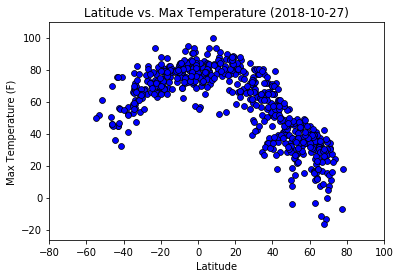

In [39]:
# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)

plt.savefig("figure1")
plt.show()

#### Latitude vs. Humidity Plot

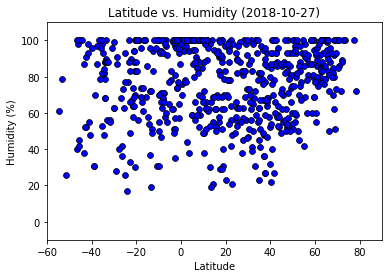

In [30]:
# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-60,90)
plt.ylim(-10, 110)

plt.savefig("figure2")
plt.show()

#### Latitude vs. Cloudiness Plot

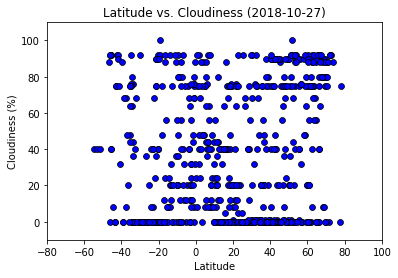

In [31]:
# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)

plt.savefig("figure3")
plt.show()

#### Latitude vs. Wind Speed Plot

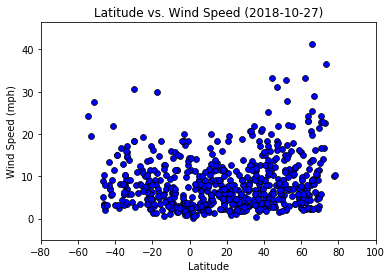

In [32]:
# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)

plt.savefig("figure4")
plt.show()